# Import modules

In [1]:
from datetime import datetime

In [3]:
-168+1.43+8.01-0.43+2.25-0.61

-157.35000000000002

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc

# Load .nc file 

### single file

In [3]:
save_dir = r"C:\Users\quant\SynologyDrive\09 Data\Fridge Data\Qubit\20240521_DR4_5Q4C_0430#7\00 raw data"
save_name = "flux_resonator_q0_ro_q0_z_20240522_1410"

save_path = f"{save_dir}\{save_name}"
load_path =  f"{save_path}.nc"

dataset = xr.open_dataset(load_path)

print(dataset)

<xarray.Dataset> Size: 242kB
Dimensions:    (mixer: 2, frequency: 150, flux: 100)
Coordinates:
  * mixer      (mixer) <U1 8B 'I' 'Q'
  * frequency  (frequency) float64 1kB -4.0 -3.9 -3.8 -3.7 ... 10.7 10.8 10.9
  * flux       (flux) float64 800B -0.5 -0.49 -0.48 -0.47 ... 0.47 0.48 0.49
Data variables:
    q0_ro      (mixer, frequency, flux) float64 240kB ...


### multiple files

In [3]:
datasets = []

save_dir = r"C:\Users\quant\SynologyDrive\09 Data\Fridge Data\Qubit\20240510_DR4_5Q4C_0411#6\05 q2 c1 c2 widez"
# save_names = "flux_resonator_q7_ro_q2_z_20240514_1531", "flux_resonator_q7_ro_q6_z_20240514_1534", "flux_resonator_q7_ro_q7_z_20240514_1536"
# save_names = "Spectrum_q7_xy_q7_z_20240514_1056", "Spectrum_q7_xy_q7_z_20240514_1059", "Spectrum_q7_xy_q7_z_20240514_1103", "Spectrum_q7_xy_q7_z_20240514_1105", "Spectrum_q7_xy_q7_z_20240514_1108", "Spectrum_q7_xy_q7_z_20240514_1111", "Spectrum_q7_xy_q7_z_20240514_1113", "Spectrum_q7_xy_q7_z_20240514_1116", "Spectrum_q7_xy_q7_z_20240514_1119"
save_names = "flux_resonator_q7_ro_q6_z_20240514_1534", "Spectrum_q2_xy_q6_z_z_pulse_20240514_2116"

for save_name in save_names:
    save_path = f"{save_dir}\{save_name}"
    load_path =  f"{save_path}.nc"

    dataset = xr.open_dataset(load_path)

    datasets.append(dataset)

print(f"number of nc files imported: {len(datasets)} \n")
print(datasets)

number of nc files imported: 2 

[<xarray.Dataset> Size: 3MB
Dimensions:    (mixer: 2, frequency: 200, flux: 1000)
Coordinates:
  * mixer      (mixer) <U1 8B 'I' 'Q'
  * frequency  (frequency) float64 2kB -10.0 -9.9 -9.8 -9.7 ... 9.6 9.7 9.8 9.9
  * flux       (flux) float64 8kB -0.5 -0.499 -0.498 ... 0.497 0.498 0.499
Data variables:
    q7_ro      (mixer, frequency, flux) float64 3MB ..., <xarray.Dataset> Size: 32MB
Dimensions:    (mixer: 2, flux: 1000, frequency: 2000)
Coordinates:
  * mixer      (mixer) <U1 8B 'I' 'Q'
  * frequency  (frequency) float64 16kB -350.0 -349.8 -349.6 ... 49.4 49.6 49.8
  * flux       (flux) float64 8kB -0.5 -0.499 -0.498 ... 0.497 0.498 0.499
Data variables:
    q7_ro      (mixer, flux, frequency) float64 32MB ...
Attributes:
    ro_IF:     -214000000
    xy_IF:     -28000000
    xy_LO:     4450000000
    z_offset:  -0.02]


# S3

2024-05-22 14:12:43,954 - qm - INFO     - Starting session: 53a6abff-9254-4164-8fef-bf1b7bd15a16


NameError: name 'datasets' is not defined

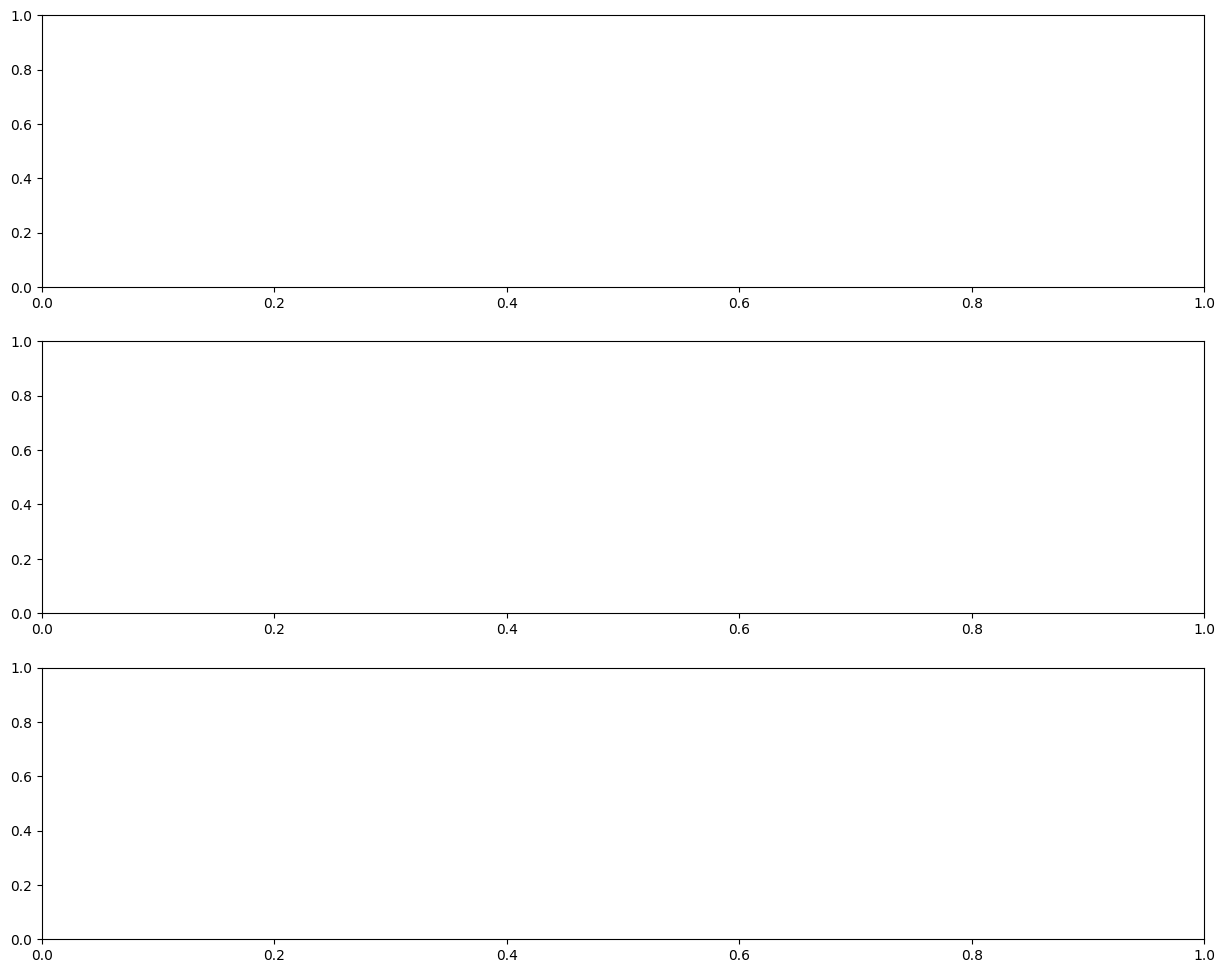

In [4]:
from exp.rofreq_sweep_flux_dep import plot_flux_dep_resonator

LO = 6.07 # GHz

fig, ax = plt.subplots(3,1, figsize=(15,12))

for i in range(len(datasets)):
    dataset = datasets[i]
    dfs = dataset.coords["frequency"].values
    amps = dataset.coords["flux"].values
    for ro_name, data in dataset.data_vars.items():
        plot_flux_dep_resonator( data.values, dfs, amps, ax[i])


# c1z_l, c1z_r = -0.14, 0.117
# ax[1].axvline(c1z_l, color='k', linestyle='--', linewidth=1.5, label=f"{c1z_l} V")
# ax[1].axvline(c1z_r, color='k', linestyle='--', linewidth=1.5, label=f"{c1z_r} V")

# c2z_l, c2z_r = -0.24, 0.218
# ax[2].axvline(c2z_l, color='k', linestyle='--', linewidth=1.5, label=f"{c2z_l} V")
# ax[2].axvline(c2z_r, color='k', linestyle='--', linewidth=1.5, label=f"{c2z_r} V")


ax[0].set_title(f"q2 ro, LO = {LO}GHz")
ax[0].set_xlabel("q2 flux [V]")
ax[1].set_xlabel("c1 flux [V]")
ax[2].set_xlabel("c2 flux [V]")

# ax[1].legend()
# ax[2].legend()

plt.tight_layout()
plt.show()

# S4

q6_ro 6700.0 -61.0 -0.0168 (2, 2000, 1850)


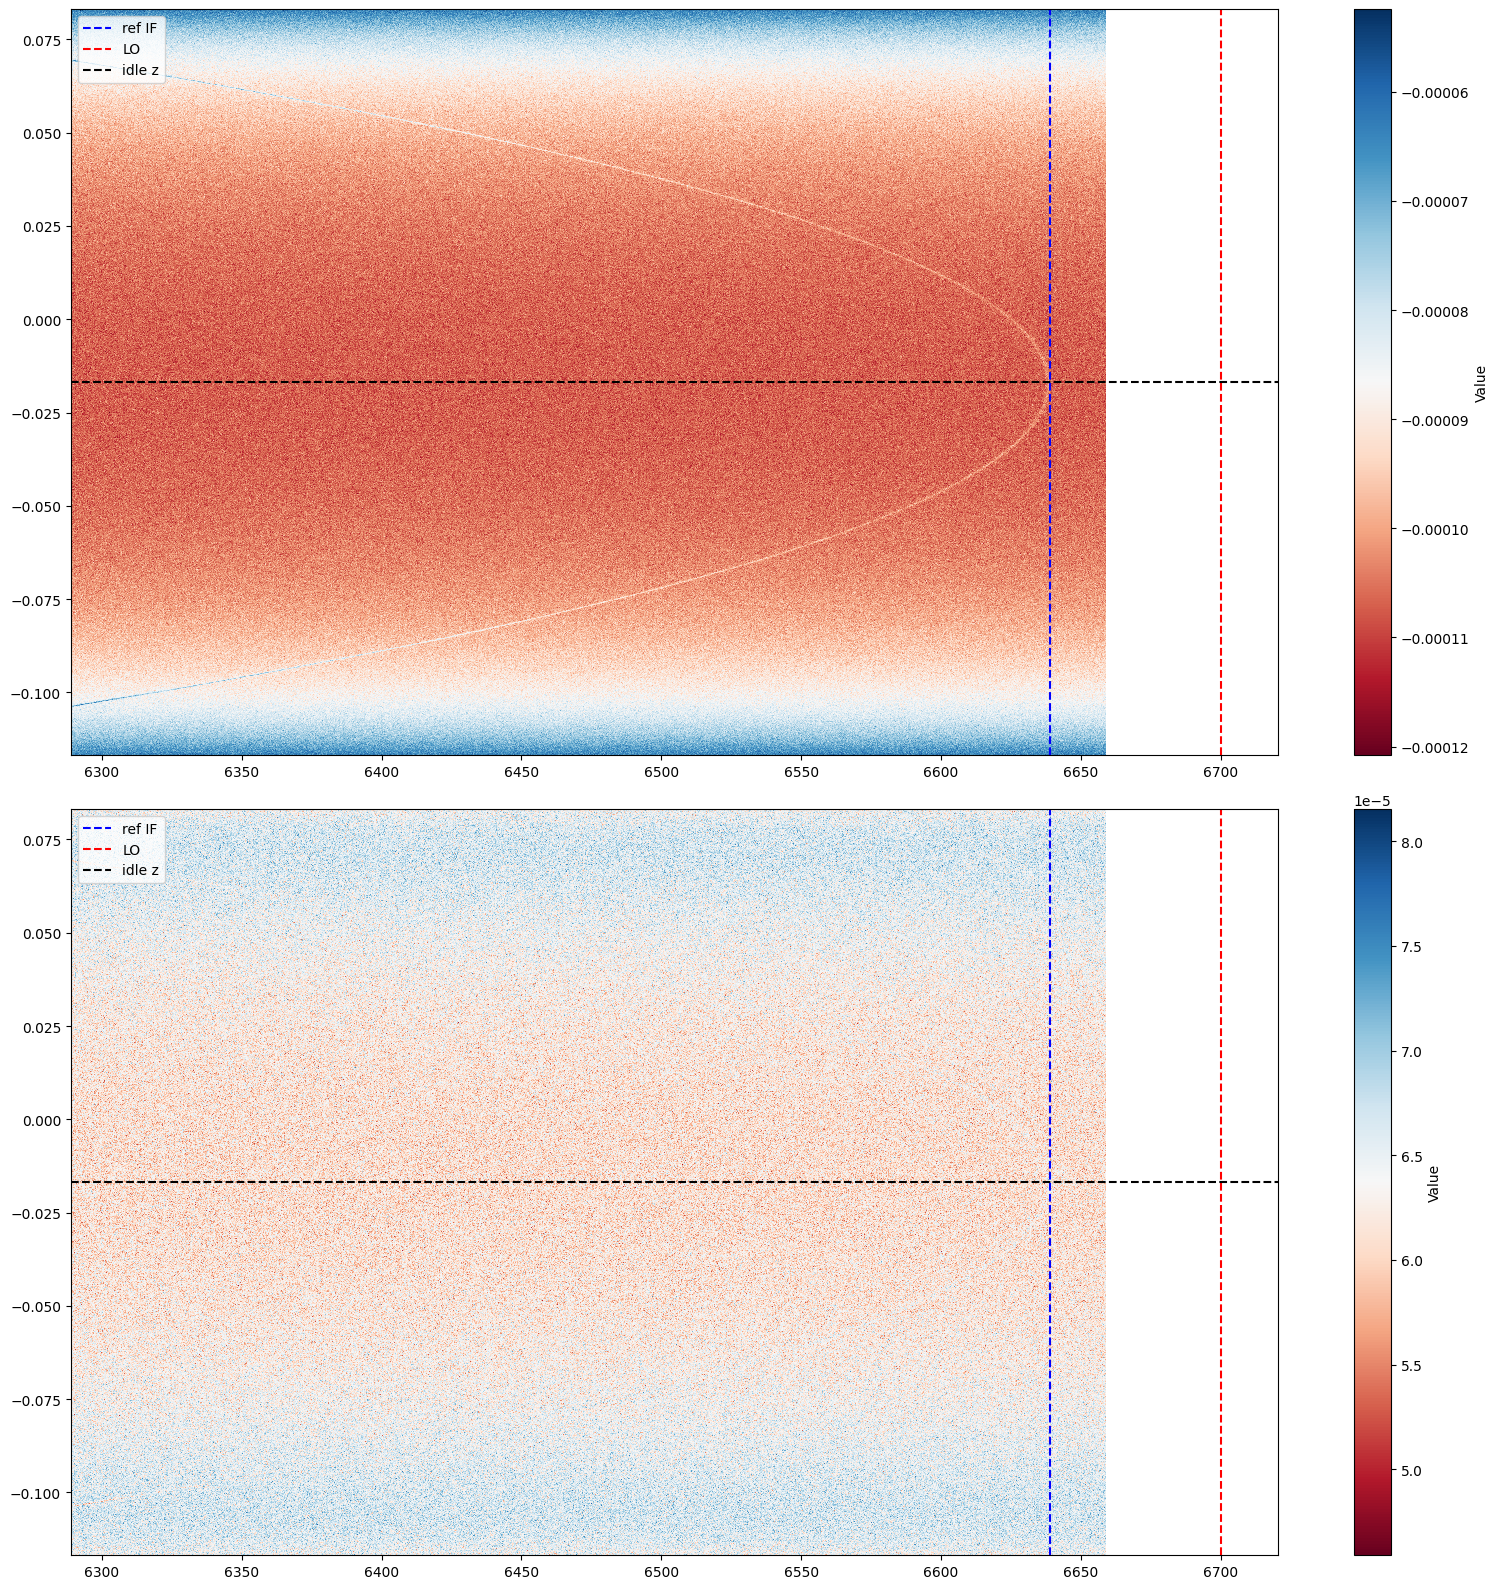

In [33]:
from exp.xyfreq_sweep_flux_dep import *

fig, ax = plt.subplots(2,1, figsize=(16,16))

# Plot
freqs = dataset.coords["frequency"].values
flux = dataset.coords["flux"].values
for i, (ro_name, data) in enumerate(dataset.data_vars.items()):
    xy_LO = dataset.attrs["xy_LO"]/1e6
    xy_IF_idle = dataset.attrs["xy_IF"]/1e6
    z_offset = dataset.attrs["z_offset"]

    idata = data[0]
    qdata = data[1]
    zdata = (idata +1j*qdata)

    print(ro_name, xy_LO, xy_IF_idle, z_offset, data.shape)
    # fig, ax = plt.subplots(2)
    plot_ana_flux_dep_qubit(data, flux, freqs, xy_LO, xy_IF_idle, z_offset, (ax[0],ax[1]), -45)
    # plot_ana_flux_dep_qubit(data, flux, freqs, xy_LO, xy_IF_idle, z_offset, ax)
    # ax[0].set_title(ro_name)
    # ax[1].set_title(ro_name)

        
# ax[0].axvline(6639, color='k')

plt.tight_layout()
plt.show()

q7_ro 4450.0 -50.0 -0.005 (2, 80, 400)
q7_ro 4750.0 -50.0 -0.005 (2, 80, 400)
q7_ro 5050.0 -50.0 -0.005 (2, 80, 400)
q7_ro 5350.0 -50.0 -0.005 (2, 80, 400)
q7_ro 5650.0 -50.0 -0.005 (2, 80, 400)
q7_ro 5950.0 -50.0 -0.005 (2, 80, 400)
q7_ro 6250.0 -50.0 -0.005 (2, 80, 400)
q7_ro 6550.0 -50.0 -0.005 (2, 80, 400)
q7_ro 6750.0 -50.0 -0.005 (2, 80, 400)


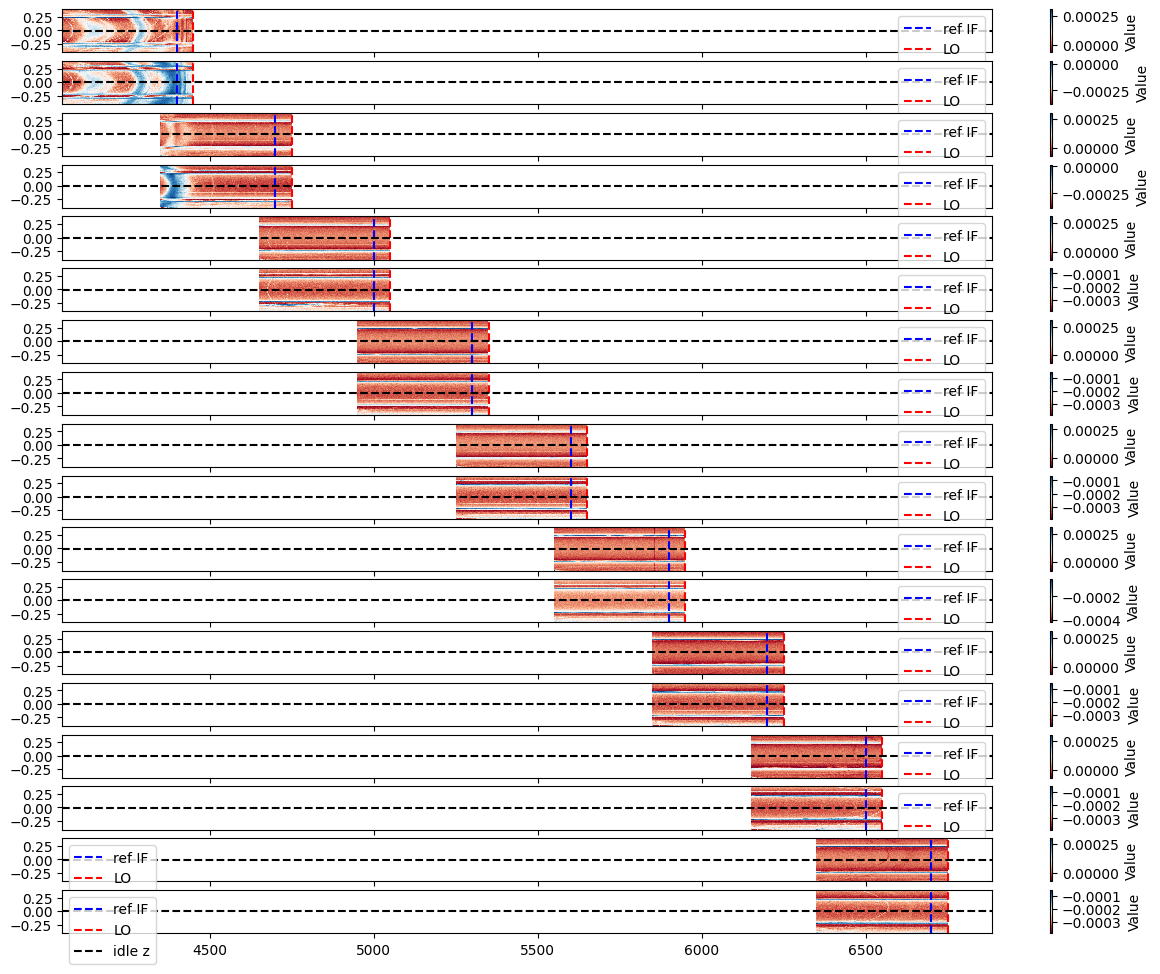

In [30]:
from exp.xyfreq_sweep_flux_dep import *

fig, ax = plt.subplots(2*len(datasets),1, figsize=(15,12), sharex=1)
# fig, ax = plt.subplots(2,1, figsize=(15,12), sharex=1)


for i in range(len(datasets)):
    dataset = datasets[i]
    # Plot
    freqs = dataset.coords["frequency"].values
    flux = dataset.coords["flux"].values
    for j, (ro_name, data) in enumerate(dataset.data_vars.items()):
        xy_LO = dataset.attrs["xy_LO"]/1e6
        xy_IF_idle = dataset.attrs["xy_IF"]/1e6
        z_offset = dataset.attrs["z_offset"]
        print(ro_name, xy_LO, xy_IF_idle, z_offset, data.shape)
        # fig, ax = plt.subplots(2)
        plot_ana_flux_dep_qubit(data, flux, freqs, xy_LO, xy_IF_idle, z_offset, (ax[2*i],ax[2*i+1]))
        # plot_ana_flux_dep_qubit(data, flux, freqs, xy_LO, xy_IF_idle, z_offset, ax)
        # ax[0].set_title(ro_name)
        # ax[1].set_title(ro_name)

# plt.tight_layout()
plt.show()

# S3+S4

In [4]:
dataset = datasets[0]

<xarray.Dataset> Size: 3MB
Dimensions:    (mixer: 2, frequency: 200, flux: 1000)
Coordinates:
  * mixer      (mixer) <U1 8B 'I' 'Q'
  * frequency  (frequency) float64 2kB -10.0 -9.9 -9.8 -9.7 ... 9.6 9.7 9.8 9.9
  * flux       (flux) float64 8kB -0.5 -0.499 -0.498 ... 0.497 0.498 0.499
Data variables:
    q7_ro      (mixer, frequency, flux) float64 3MB ...

In [ ]:
dfs = dataset.coords["frequency"].values
amps = dataset.coords["flux"].values

